# Scattering: Born approximation scattering 
Let us consider elastic scattering the Born approximation. We found that the scattering cross section can be expressed as
$$
 \frac{ d \sigma}{d \Omega} =
\left( \frac{m}{2 \pi \hbar^2} \right)^2  \left\lvert V(q) \right\lvert^2\, ,
$$
where the interaction form factor is given by 
$$
V(q) 
%=  \int_0^{2 \pi} \text{d} \phi \int_0^{\pi} \text{d} \theta \sin \theta \int_0^\infty \text{d} r \, r^2  e^{- i q r \cos \theta} V( {r}) 
= \frac{4 \pi}{q} \int_0^\infty \text{d} r  \, r V( {r}) \sin ( qr ) \, .
$$
The momentum transfer is expressed as 
$$
q = \frac{2 p }{\hbar} \sin \frac{\theta}{2}\, ,
$$
where $\theta$ is the angle between the direction set by the scattering beam and the position of the detector. The momentum modulus, $p$, of incoming (and outgoing) particles of mass $m$ is related to their energy by the expression $p=\sqrt{2 m E}$.



## Yukawa interaction
Consider an interaction between projectile and target which is of the Yukawa type,
$$
V(r) =  \frac{V_0}{r} e^{ - \frac{r}{\mu} }  \, ,
$$
where $\mu$ is a constant with dimensions of length that quantifies the range of the potential and $V_0$ is a constant that quantifies the strength of the interaction and has dimensions of energy times length. In particular, in the limit $\mu \to \infty$, the Yukawa interaction cannot be distinguished from a $1/r$ potential, like the Coulomb force. 


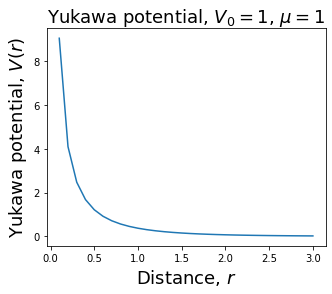

In [1]:
##########################################################################
# THIS PYTHON CODE PROVIDES SOME PLOTS FOR THE YUKAWA POTENTIAL
##########################################################################
import math
import numpy as np
import matplotlib.pyplot as plt

pi=math.pi

# WE USE FIDUCIAL VALUES FOR V0 AND MU PARAMETERS
V0=1
mu=1
r=np.linspace(0.1,3,30)

##########################################################################
# PLOT OF THE POTENTIAL
V=V0/r*np.exp(-r/mu)
fig, axs = plt.subplots(figsize=(5,4), ncols=1, nrows=1, )
plt.plot(r,V,'-')
plt.xlabel(r"Distance, $r$",fontsize=18)
plt.ylabel(r"Yukawa potential, $V(r)$",fontsize=18)
plt.title(r"Yukawa potential, $V_0=$"+str(V0)+ ", $\mu=$"+str(mu),fontsize=18)
plt.show()


### Differential cross section
To compute the Yukawa interaction form factor, we use $\sin(qr)=(e^{iqr}-e^{-iqr})/2$ and multiply the exponentials
$$
V(q) = 
\frac{2 \pi}{i q} \int_0^\infty \text{d} r \, r \frac{V_0}{r} \left[ e^{ - \frac{r}{\mu} } e^{i q r} - e^{ - \frac{r}{\mu} } e^{- i q r} \right] 
%\\
%= \frac{2 \pi V_0}{i q} 
%\left[ \frac{1}{- \frac{1}{\mu} + i q} \left. e^{ - \left( \frac{1}{\mu} - i q \right) r } \right|_0^\infty  +
%\frac{1}{\frac{1}{\mu} + i q} \left. e^{ - \left( \frac{1}{\mu} + i q \right) r } \right|_0^\infty  \right]  \\
%= \frac{2 \pi V_0}{i q} \left[ \frac{1}{\frac{1}{\mu} - i q} - \frac{1}{\frac{1}{\mu} + i q} \right] 
%= \frac{4 \pi V_0}{\frac{1}{\mu^2} + q^2} 
= \frac{4 \pi V_0 \mu^2}{1 +  \mu^2 q^2} .
$$
Introducing this form factor in the cross section formula, we find
$$
 \frac{ d \sigma}{d \Omega} 
= \left( \frac{2 m V_0 \mu^2}{\hbar^2} \right)^2  
\frac{1}{\left[ 1 + \frac{ 8 m E \mu^2 }{\hbar^2} \sin^2 \frac{\theta}{2} \right]^2}  \, .
$$
We see that a characteristic energy scale in this problem is given by $\varepsilon_\mu=\frac{\hbar^2}{2 m \mu^2}$. Using it in the previous expression, one finds:
$$
 \frac{ d \sigma}{d \Omega} =
\left( \frac{V_0}{\varepsilon_\mu} \right)^2  
\frac{1}{\left[ 1 + \frac{ 4 E}{\varepsilon_\mu} \sin^2 \frac{\theta}{2} \right]^2} =
\frac{V_0^2}{\left[ \varepsilon_\mu + 4 E\sin^2 \frac{\theta}{2} \right]^2}
\, .
$$

Clearly, in this set-up, the cross section has units given by the square of the prefactor 
$\frac{V_0}{\varepsilon_\mu}=\frac{2 m \mu^2 V_0}{\hbar^2}$, which has units of length. Consequently, the cross section itself is an area. 

One can plot the differential cross section as a function of the angle. One typically sees that the cross section at low energies is relatively angle-independent, whereas at low energies it is forward peaked.

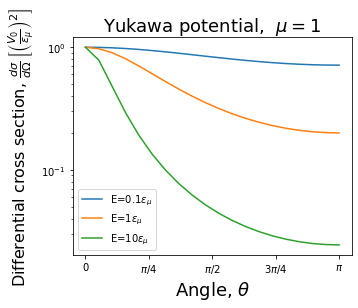

In [2]:
##########################################################################
# PLOT OF THE DIFFERENTIAL CROSS SECTION 
# ENERGY MEASURED IN UNITS OF Emu=hbar^2/2/m/mu^2
# CROSS SECTION IN UNITS OF (V_0/Emu)^2
Nth=20
theta=np.linspace(0,pi,Nth)

def dsigdom(theta,E) :
#    dsdo=np.power(V0/emu,2)/(1+4*E*np.power( np.sin(theta/2),2) )
    dsdo=1/(1+4*E*np.power( np.sin(theta/2),2) )
    return dsdo

fig, axs = plt.subplots(figsize=(5,4), ncols=1, nrows=1, )
EE=[0.1,1,10]
for E in EE :
    plt.semilogy(theta,dsigdom(theta,E),'-',label="E=" + str(E) + r"$\epsilon_\mu$")
    
plt.xlabel(r"Angle, $\theta$",fontsize=18)
plt.xticks([0,pi/4,pi/2,3*pi/4,pi],["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$",r"$\pi$",])
plt.ylabel(r"Differential cross section, $\frac{ d \sigma }{ d \Omega } \, \left[ \left( \frac{V_0}{\epsilon_\mu} \right)^2 \right]$",fontsize=16)
plt.title(r"Yukawa potential,  $\mu=$"+str(mu),fontsize=18)
plt.legend()
plt.show()


### Total cross section

The total interaction cross section is obtained integrating this expression over solid angles:
$$ 
\sigma = \int \text{d} \Omega  \frac{ d \sigma}{d \Omega} 
%&= \int_0^{2 \pi} \text{d} \phi \int_{-1}^{1} \text{d} x
%\left( \frac{V_0}{\varepsilon_\mu} \right)^2  
%\frac{1}{\left[ 1 + \frac{ 2 E}{\varepsilon_\mu} - \frac{ 2 E}{\varepsilon_\mu} x \right]^2}  \\
%&= 2 \pi \left( \frac{V_0}{\varepsilon_\mu} \right)^2  \frac{ \varepsilon_\mu }{2 E}
%\left. \frac{1}{\left[ 1 + \frac{ 2 E}{\varepsilon_\mu} - \frac{ 2 E}{\varepsilon_\mu} x \right]} \right|_{-1}^1 \\ 
%&= 2 \pi \left( \frac{V_0}{\varepsilon_\mu} \right)^2  \frac{ \varepsilon_\mu }{2 E}
%\left( 1 - \frac{1}{1+\frac{4 E}{\varepsilon_\mu}} \right) \\ 
= 4 \pi \left( \frac{V_0}{\varepsilon_\mu} \right)^2 
\frac{1}{1+ \frac{4E}{\varepsilon_\mu} } 
\, .
$$
It has the same units as before. In the low energy limit, we find that the cross section is 
$$ 
\sigma \to 
 4 \pi \left( \frac{V_0}{\varepsilon_\mu} \right)^2 
\, ,
$$
which corresponds to the area of a sphere of effective radius $R=\frac{V_0}{\varepsilon_\mu}$.

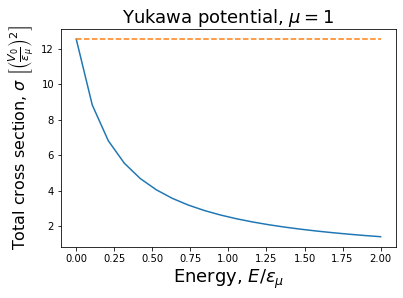

In [3]:
##########################################################################
# PLOT OF THE TOTAL CROSS SECTION 
# ENERGY MEASURED IN UNITS OF Emu=hbar^2/2/m/mu^2
NE=20
E=np.linspace(0,2,20)
tot_cross=4*pi/(1+4*E)
tot_cross0=4*pi

plt.plot(E,tot_cross,'-',E,tot_cross0*np.ones_like(E),'--')
    
plt.xlabel(r"Energy, $E/\epsilon_\mu$",fontsize=18)
plt.ylabel(r"Total cross section, $\sigma \,\, \left[ \left( \frac{V_0}{\epsilon_\mu} \right)^2 \right]$",fontsize=16)
plt.title(r"Yukawa potential, $\mu=$"+str(mu),fontsize=18)
plt.show()

## Coulomb interaction
The expressions for the Coulomb force can be obtained formally taking the $\mu \to \infty$ limit in the expressions from the previous section. One finds the so-called Rutherford scattering differential cross section,
$$ 
\frac{ d \sigma}{d \Omega}  \to
\left( \frac{V_0}{4 E} \right)^2  \frac{1}{\sin^4 \frac{\theta}{2}}
 \, .
$$
If the beam and the target have charges $Z_1$ and $Z_2$ respectively, the factor $V_0$ is just given by the Coulomb potential $V_0=\frac{Z_1 Z_2 e^2}{4 \pi \epsilon_0}$.

/var/folders/v6/7mtf4mnj6_n30gzkzyrg5_rh0000gn/T/ipykernel_31525/2592051119.py:9: RuntimeWarning: divide by zero encountered in true_divide
  dsdo=1/(4*E*np.power( np.sin(theta/2),2) )


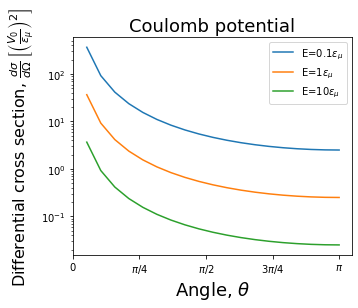

In [6]:
##########################################################################
# PLOT OF THE DIFFERENTIAL CROSS SECTION 
# ENERGY MEASURED IN UNITS OF Emu=hbar^2/2/m/mu^2
# CROSS SECTION IN UNITS OF (V_0/Emu)^2
Nth=20
theta=np.linspace(0,pi,Nth)

def dsigdom(theta,E) :
    dsdo=1/(4*E*np.power( np.sin(theta/2),2) )
    return dsdo

fig, axs = plt.subplots(figsize=(5,4), ncols=1, nrows=1, )
EE=[0.1,1,10]
for E in EE :
    plt.semilogy(theta,dsigdom(theta,E),'-',label="E=" + str(E) + r"$\epsilon_\mu$")
    
plt.xlabel(r"Angle, $\theta$",fontsize=18)
plt.xticks([0,pi/4,pi/2,3*pi/4,pi],["0",r"$\pi/4$",r"$\pi/2$",r"$3\pi/4$",r"$\pi$",])
plt.ylabel(r"Differential cross section, $\frac{ d \sigma }{ d \Omega } \, \left[ \left( \frac{V_0}{\epsilon_\mu} \right)^2 \right]$",fontsize=16)
plt.title(r"Coulomb potential",fontsize=18)
plt.legend()
plt.show()
